In [39]:
import redis 
from deepface import DeepFace
from deepface.commons import functions, distance
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = redis.StrictRedis(host = 'localhost', port = 6379)

In [3]:
model = DeepFace.build_model("Facenet512")

In [4]:
input_shape = (160, 160)

In [6]:
source_path = "source.jpg"
source = functions.preprocess_face(source_path, target_size = input_shape)

24-01-04 01:19:49 - ⚠️ Function preprocess_face is deprecated. Use extract_faces instead.


In [7]:
source.shape

(160, 160, 3)

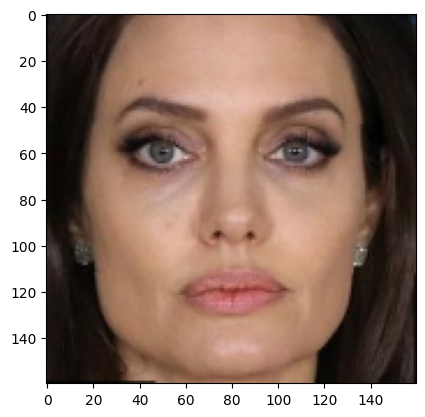

In [8]:
plt.imshow(source[:,:,::-1])

In [9]:
result = DeepFace.represent(img_path=source_path, model_name="Facenet512")

In [10]:
embedding = result[0]['embedding']

In [15]:
len(embedding)

512

In [16]:
r.rpush("embedding:angelina", *embedding)

512

In [17]:
embeddings = [e.decode('utf-8') for e in r.lrange('embedding:angelina', 0, -1)]

In [18]:
embedding

[0.340012788772583,
 -0.9634085297584534,
 -1.3910646438598633,
 -0.5279219150543213,
 0.7963132262229919,
 0.6883246898651123,
 0.8692520260810852,
 0.8001625537872314,
 0.6069297790527344,
 0.2240234911441803,
 -1.06863534450531,
 2.039099931716919,
 -0.6179769039154053,
 -1.221764326095581,
 0.3118382692337036,
 -0.8379310965538025,
 1.063752293586731,
 -0.4250022768974304,
 0.5320858359336853,
 -0.5040813088417053,
 0.14854967594146729,
 1.064997911453247,
 -0.38735777139663696,
 -0.5058555603027344,
 -0.5352312326431274,
 0.8575392961502075,
 0.25427961349487305,
 -0.8555554747581482,
 -1.165794849395752,
 -0.8266045451164246,
 -0.5506894588470459,
 -1.7879359722137451,
 -0.20091590285301208,
 -0.3665187954902649,
 -1.1105581521987915,
 0.5317883491516113,
 -0.5573975443840027,
 0.21589471399784088,
 0.8614561557769775,
 -0.4427354037761688,
 0.9767249226570129,
 -1.4635016918182373,
 -0.7388002276420593,
 -1.1831179857254028,
 -1.1134212017059326,
 0.6601867079734802,
 0.15911398

## Target

In [43]:
target_path = 'tests/img3.jpg'

In [44]:
target = functions.preprocess_face(target_path, target_size = input_shape)

24-01-04 01:31:51 - ⚠️ Function preprocess_face is deprecated. Use extract_faces instead.


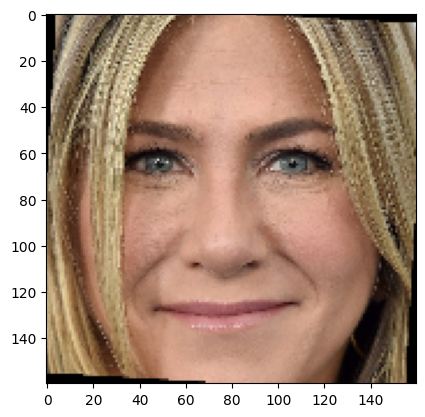

In [45]:
plt.imshow(target[:,:,::-1])

In [46]:
result_target = DeepFace.represent(img_path=target_path, model_name="Facenet512")

In [47]:
target_embedding = result_target[0]['embedding']

In [48]:
len(target_embedding)

512

In [49]:
source_embedding = r.lrange("embedding:angelina", 0, -1)

In [50]:
source_embedding = np.array(source_embedding).astype('float')

In [51]:
len(source_embedding)

512

In [52]:
source_embedding.shape

(512,)

In [55]:
distance.findEuclideanDistance(source_embedding, target_embedding) <= 20

False